In [1]:
%pylab inline
from pandas import Series, DataFrame
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# the `Series` class
grades1 = Series([76, 82, 78, 100],
                 index=['alex', 'robert', 'minnie', 'alice'],
                 name='assignment1', dtype=float64)
grades1

alex       76
robert     82
minnie     78
alice     100
Name: assignment1, dtype: float64

In [3]:
for student in grades1.keys():
    print '{} got {} points in {}'.format(student, grades1[student], grades1.name)

alex got 76.0 points in assignment1
robert got 82.0 points in assignment1
minnie got 78.0 points in assignment1
alice got 100.0 points in assignment1


In [4]:
grades1a = grades1.append(Series([79, 81], index=['theo', 'joe']))
grades1a

alex       76
robert     82
minnie     78
alice     100
theo       79
joe        81
dtype: float64

In [5]:
grades2 = Series([87, 76, 76, 94, 88],
                 index=['alex', 'lucy', 'robert', 'minnie', 'alice'],
                 dtype=float64)
grades2

alex      87
lucy      76
robert    76
minnie    94
alice     88
dtype: float64

In [6]:
average = 0.5 * (grades1 + grades2)
average

alex      81.5
alice     94.0
lucy       NaN
minnie    86.0
robert    79.0
dtype: float64

In [7]:
average.isnull()

alex      False
alice     False
lucy       True
minnie    False
robert    False
dtype: bool

In [8]:
average.dropna()

alex      81.5
alice     94.0
minnie    86.0
robert    79.0
dtype: float64

In [9]:
grades1.sort()
grades1

alex       76
minnie     78
robert     82
alice     100
Name: assignment1, dtype: float64

In [10]:
grades1.sort_index()

alex       76
alice     100
minnie     78
robert     82
Name: assignment1, dtype: float64

In [11]:
temps = Series([71, 76, 69, 67, 74, 80, 82, 70, 66, 80],
               index=range(6, 16),
               name='temperatures', dtype=float64)
temps

6     71
7     76
8     69
9     67
10    74
11    80
12    82
13    70
14    66
15    80
Name: temperatures, dtype: float64

In [12]:
temps.describe()

count    10.000000
mean     73.500000
std       5.778312
min      66.000000
25%      69.250000
50%      72.500000
75%      79.000000
max      82.000000
Name: temperatures, dtype: float64

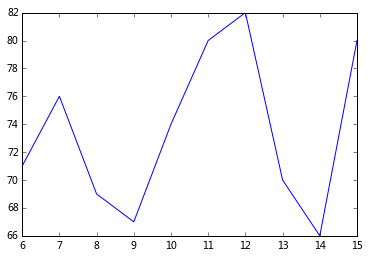

In [13]:
temps.plot();

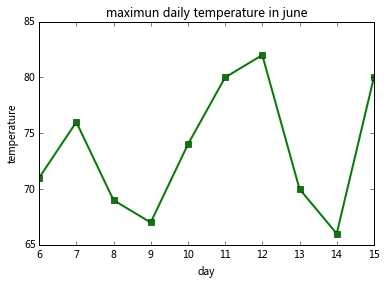

In [14]:
temps.plot(style='-s', lw=2, color='green')
axis((6, 15, 65, 85))
xlabel('day')
ylabel('temperature')
title('maximun daily temperature in june');

In [15]:
temps[temps > 75]

7     76
11    80
12    82
15    80
Name: temperatures, dtype: float64

In [16]:
# the `DataFrame` class
grades = DataFrame(
[['alice', 80., 92., 84.],
 ['bob', 78., NaN, 86.],
 ['samaly', 75., 78., 88.]],
index=[17005, 17035, 17028],
columns=['name', 'test1', 'test2', 'final'])
grades

,name,test1,test2,final
17005,alice,80,92,84
17035,bob,78,NaN,86
17028,samaly,75,78,88


In [17]:
idx = pd.Index(["1st row", "2ed row"])
col1 = Series([1, 2], index=idx)
col2 = Series([3, 4], index=idx)
data = {"column1": col1, "column2": col2}
df = DataFrame(data)
df

,column1,column2
1st row,1,3
2ed row,2,4


In [18]:
# `loc`  is label-based
# `iloc` is integer-based
# `ix`   supports mixed integer and label-based access
grades.loc[17035, 'test2'] = 98
grades.loc[:, 'score'] = 0.25 * (grades['test1'] + grades['test2'] + 2 * grades['final'])
grades

,name,test1,test2,final,score
17005,alice,80,92,84,85.00
17035,bob,78,98,86,87.00
17028,samaly,75,78,88,82.25


In [19]:
grades.insert(4, 'extra credit', [2., 6., 10.])
grades

,name,test1,test2,final,extra credit,score
17005,alice,80,92,84,2,85.00
17035,bob,78,98,86,6,87.00
17028,samaly,75,78,88,10,82.25


In [20]:
grades.loc[17011,:] = ['george', 92, 88, 91, 9, NaN]
grades

,name,test1,test2,final,extra credit,score
17005,alice,80,92,84,2,85.00
17035,bob,78,98,86,6,87.00
17028,samaly,75,78,88,10,82.25
17011,george,92,88,91,9,NaN


In [21]:
grades.loc[:, 'score'] = 0.25 * (grades['test1'] + grades['test2'] + 2 * grades['final'] + grades['extra credit'])
grades

,name,test1,test2,final,extra credit,score
17005,alice,80,92,84,2,85.50
17035,bob,78,98,86,6,88.50
17028,samaly,75,78,88,10,84.75
17011,george,92,88,91,9,92.75


In [22]:
grades[(80 <= grades['score']) & grades['score'] < 90].loc[:, ['name', 'score']]

,name,score
17005,alice,85.50
17035,bob,88.50
17028,samaly,84.75
17011,george,92.75


In [23]:
means = [0, 0, 1, 1, -1, -1, -2, -2]
sdevs = [1, 2, 1, 2, 1, 2, 1, 2]
random_data = {}
nrows = 30
for mean, sdev in zip(means, sdevs):
    label = 'mean={}, sd={}'.format(mean, sdev)
    random_data[label] = normal(mean, sdev, nrows)
row_labels = ['row {}'.format(i) for i in range(nrows)]
dframe = DataFrame(random_data, index=row_labels)
dframe

,"mean=-1, sd=1","mean=-1, sd=2","mean=-2, sd=1","mean=-2, sd=2","mean=0, sd=1","mean=0, sd=2","mean=1, sd=1","mean=1, sd=2"
row 0,-2.944371,0.414083,-0.780505,-3.136910,-0.153699,1.459765,2.035121,2.927880
row 1,-0.845441,-1.697681,-0.690724,-1.994321,-2.243529,1.621782,1.792002,1.631725
row 2,0.559436,1.148708,-1.857499,-3.801936,1.732110,-1.010190,0.676356,3.622431
row 3,0.310454,-2.112498,-1.307020,0.171470,-0.489686,0.582460,0.633954,2.589920
row 4,-1.860603,-3.205955,-2.312694,-4.993823,1.300671,-1.124730,0.027486,-0.147162
row 5,-0.689283,2.943303,-2.897979,-3.713511,0.874859,-2.119874,3.359085,-1.042094
row 6,-1.782621,-3.651391,-0.861189,-6.614680,-0.362507,-0.769576,0.668185,0.763609
row 7,-0.371129,-3.514599,-3.442572,-3.897128,-0.501844,0.682006,-0.119542,-0.814991
row 8,-1.972344,-4.804326,-1.856168,-3.354434,-0.740350,1.405124,1.744256,1.311038
row 9,-1.649976,-0.545948,-0.574688,-5.416413,-0.095766,-0.843378,-0.595737,-1.552912


In [24]:
dframe_slice = dframe.ix['row 3':'row 11', 5:]
dframe_slice
# form `row 3` to `row 11`
# from `col 5` to `the end`

,"mean=0, sd=2","mean=1, sd=1","mean=1, sd=2"
row 3,0.582460,0.633954,2.589920
row 4,-1.124730,0.027486,-0.147162
row 5,-2.119874,3.359085,-1.042094
row 6,-0.769576,0.668185,0.763609
row 7,0.682006,-0.119542,-0.814991
row 8,1.405124,1.744256,1.311038
row 9,-0.843378,-0.595737,-1.552912
row 10,-0.120045,2.421641,-1.548490
row 11,-0.581929,1.196064,4.855832


In [25]:
dframe_slice.loc['row 3','mean=1, sd=2'] = normal(1, 2)
print dframe_slice.loc['row 3','mean=1, sd=2']
print dframe.loc['row 3','mean=1, sd=2']

2.39050456951
2.39050456951


In [26]:
dframe_slice_copy = dframe.ix['row 3':'row 11', 5:].copy()
dframe_slice_copy

,"mean=0, sd=2","mean=1, sd=1","mean=1, sd=2"
row 3,0.582460,0.633954,2.390505
row 4,-1.124730,0.027486,-0.147162
row 5,-2.119874,3.359085,-1.042094
row 6,-0.769576,0.668185,0.763609
row 7,0.682006,-0.119542,-0.814991
row 8,1.405124,1.744256,1.311038
row 9,-0.843378,-0.595737,-1.552912
row 10,-0.120045,2.421641,-1.548490
row 11,-0.581929,1.196064,4.855832


In [27]:
dframe_slice_copy.loc['row 3', 'mean=1, sd=2'] = normal(1, 2)
print dframe_slice_copy.loc['row 3','mean=1, sd=2']
print dframe.loc['row 3','mean=1, sd=2']

0.882754997027
2.39050456951


In [28]:
# slicing with list
dframe.ix[['row 12', 'row 3', 'row 24'], [3, 7]]

,"mean=-2, sd=2","mean=1, sd=2"
row 12,-2.151526,1.401836
row 3,0.171470,2.390505
row 24,-2.309721,0.758714


In [29]:
# slicing to reorder columns
# dframe.iloc[:,[-1::-1]]

In [30]:
# arbitrary reordering
dframe.iloc[:, [2, 7, 0, 1, 3, 6, 5]]

,"mean=-2, sd=1","mean=1, sd=2","mean=-1, sd=1","mean=-1, sd=2","mean=-2, sd=2","mean=1, sd=1","mean=0, sd=2"
row 0,-0.780505,2.927880,-2.944371,0.414083,-3.136910,2.035121,1.459765
row 1,-0.690724,1.631725,-0.845441,-1.697681,-1.994321,1.792002,1.621782
row 2,-1.857499,3.622431,0.559436,1.148708,-3.801936,0.676356,-1.010190
row 3,-1.307020,2.390505,0.310454,-2.112498,0.171470,0.633954,0.582460
row 4,-2.312694,-0.147162,-1.860603,-3.205955,-4.993823,0.027486,-1.124730
row 5,-2.897979,-1.042094,-0.689283,2.943303,-3.713511,3.359085,-2.119874
row 6,-0.861189,0.763609,-1.782621,-3.651391,-6.614680,0.668185,-0.769576
row 7,-3.442572,-0.814991,-0.371129,-3.514599,-3.897128,-0.119542,0.682006
row 8,-1.856168,1.311038,-1.972344,-4.804326,-3.354434,1.744256,1.405124
row 9,-0.574688,-1.552912,-1.649976,-0.545948,-5.416413,-0.595737,-0.843378


In [31]:
# slicing with boolean operation
dframe.loc[dframe.loc[:,'mean=1, sd=1']>0, 'mean=1, sd=1']

row 0     2.035121
row 1     1.792002
row 2     0.676356
row 3     0.633954
row 4     0.027486
row 5     3.359085
row 6     0.668185
row 8     1.744256
row 10    2.421641
row 11    1.196064
row 12    3.368727
row 13    0.831806
row 14    2.037470
row 15    2.811778
row 16    0.667996
row 17    1.382971
row 19    0.068525
row 20    1.479573
row 21    1.466435
row 23    3.203326
row 24    1.486697
row 26    0.308561
row 27    1.880568
row 28    0.798773
row 29    0.569383
Name: mean=1, sd=1, dtype: float64

In [32]:
# has missing values(NaN)
dframe.where(dframe>0)

,"mean=-1, sd=1","mean=-1, sd=2","mean=-2, sd=1","mean=-2, sd=2","mean=0, sd=1","mean=0, sd=2","mean=1, sd=1","mean=1, sd=2"
row 0,NaN,0.414083,NaN,NaN,NaN,1.459765,2.035121,2.927880
row 1,NaN,NaN,NaN,NaN,NaN,1.621782,1.792002,1.631725
row 2,0.559436,1.148708,NaN,NaN,1.732110,NaN,0.676356,3.622431
row 3,0.310454,NaN,NaN,0.171470,NaN,0.582460,0.633954,2.390505
row 4,NaN,NaN,NaN,NaN,1.300671,NaN,0.027486,NaN
row 5,NaN,2.943303,NaN,NaN,0.874859,NaN,3.359085,NaN
row 6,NaN,NaN,NaN,NaN,NaN,NaN,0.668185,0.763609
row 7,NaN,NaN,NaN,NaN,NaN,0.682006,NaN,NaN
row 8,NaN,NaN,NaN,NaN,NaN,1.405124,1.744256,1.311038
row 9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# replace non-negative values by 0
dframe.where(dframe>0, other=0)

,"mean=-1, sd=1","mean=-1, sd=2","mean=-2, sd=1","mean=-2, sd=2","mean=0, sd=1","mean=0, sd=2","mean=1, sd=1","mean=1, sd=2"
row 0,0.000000,0.414083,0.000000,0.000000,0.000000,1.459765,2.035121,2.927880
row 1,0.000000,0.000000,0.000000,0.000000,0.000000,1.621782,1.792002,1.631725
row 2,0.559436,1.148708,0.000000,0.000000,1.732110,0.000000,0.676356,3.622431
row 3,0.310454,0.000000,0.000000,0.171470,0.000000,0.582460,0.633954,2.390505
row 4,0.000000,0.000000,0.000000,0.000000,1.300671,0.000000,0.027486,0.000000
row 5,0.000000,2.943303,0.000000,0.000000,0.874859,0.000000,3.359085,0.000000
row 6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.668185,0.763609
row 7,0.000000,0.000000,0.000000,0.000000,0.000000,0.682006,0.000000,0.000000
row 8,0.000000,0.000000,0.000000,0.000000,0.000000,1.405124,1.744256,1.311038
row 9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [34]:
# computational and graphics tools
means = [0, 0, 1, 1, -1, -1, -2, -2]
sdevs = [1, 2, 1, 2, 1, 2, 1, 2]
random_data = {}
nrows = 30
for mean, sdev in zip(means, sdevs):
    label = 'mean={}, sd={}'.format(mean, sdev)
    random_data[label] = normal(mean, sdev, nrows)
row_labels = ['row {}'.format(i) for i in range(nrows)]
dframe = DataFrame(random_data, index=row_labels)
dframe

,"mean=-1, sd=1","mean=-1, sd=2","mean=-2, sd=1","mean=-2, sd=2","mean=0, sd=1","mean=0, sd=2","mean=1, sd=1","mean=1, sd=2"
row 0,-0.705295,-3.353413,-1.438965,-2.417599,0.301851,1.865399,0.653809,1.738558
row 1,-3.290175,-0.772989,-3.293627,-0.627599,1.226787,-2.050705,0.955375,-0.569485
row 2,-3.216881,-0.642658,-2.457195,-1.046296,-0.577515,1.595522,1.413761,3.944785
row 3,-1.904090,1.268343,-0.406298,1.672025,3.048698,1.338054,1.774475,-0.982850
row 4,-0.843267,-1.077813,-1.848820,-2.031746,-0.247272,2.077064,0.994122,0.027279
row 5,0.245798,-1.812860,-4.058306,-2.635035,0.441965,0.815707,-0.962054,-1.468983
row 6,0.256593,2.094760,-2.273916,-3.006559,1.175127,-1.552779,1.106879,1.389816
row 7,-1.346309,-2.539341,-1.207852,0.350666,0.626076,-1.271936,0.858082,1.950345
row 8,-1.224818,0.645540,-1.609687,-3.592919,-1.657396,0.977812,1.169145,-1.532426
row 9,-0.539068,-0.517471,-3.246983,-1.229971,2.729684,0.597980,0.890154,-2.506461


In [35]:
dframe.mean()

mean=-1, sd=1   -1.062194
mean=-1, sd=2   -0.982554
mean=-2, sd=1   -2.048789
mean=-2, sd=2   -1.966455
mean=0, sd=1     0.072317
mean=0, sd=2     0.007337
mean=1, sd=1     0.902406
mean=1, sd=2     0.412355
dtype: float64

In [36]:
dframe.std()

mean=-1, sd=1    1.096499
mean=-1, sd=2    2.104225
mean=-2, sd=1    1.072879
mean=-2, sd=2    1.974187
mean=0, sd=1     1.166845
mean=0, sd=2     1.670894
mean=1, sd=1     0.902163
mean=1, sd=2     1.705214
dtype: float64

In [37]:
mean_series = dframe.mean()
std_series = dframe.std()
mean_std = DataFrame([dict(mean_series), dict(std_series)], index=['mean', 'std'])
mean_std

,"mean=-1, sd=1","mean=-1, sd=2","mean=-2, sd=1","mean=-2, sd=2","mean=0, sd=1","mean=0, sd=2","mean=1, sd=1","mean=1, sd=2"
mean,-1.062194,-0.982554,-2.048789,-1.966455,0.072317,0.007337,0.902406,0.412355
std,1.096499,2.104225,1.072879,1.974187,1.166845,1.670894,0.902163,1.705214


In [38]:
dframe_stnd = 100 + 20 * (dframe - mean_std.iloc[0,:]) / mean_std.iloc[1,:]
dframe_stnd

,"mean=-1, sd=1","mean=-1, sd=2","mean=-2, sd=1","mean=-2, sd=2","mean=0, sd=1","mean=0, sd=2","mean=1, sd=1","mean=1, sd=2"
row 0,106.509798,77.465734,111.367980,95.429572,103.934276,122.240324,94.488864,115.554684
row 1,59.361912,101.991857,76.794444,113.563613,119.787893,75.365978,101.174272,88.484254
row 2,60.698780,103.230613,92.386718,109.321899,88.861735,119.009994,111.336212,141.430936
row 3,84.643936,121.394079,130.618368,136.860536,151.015888,115.928200,119.332852,83.636006
row 4,103.993215,99.094593,103.727708,99.338548,94.522170,124.773883,102.033257,95.483548
row 5,123.857612,92.108203,62.539732,93.226782,106.335853,109.675894,58.666887,77.934283
row 6,124.054521,129.248913,95.803316,89.462963,118.902435,81.325971,104.532942,111.464380
row 7,94.817785,85.203233,115.676261,123.474173,109.491565,84.687561,99.017387,118.038676
row 8,97.033771,115.474528,108.185475,83.522691,70.352313,111.616227,105.913315,77.190174
row 9,109.541761,104.420473,77.663964,107.461136,145.547908,107.069779,99.728382,65.765982


In [39]:
print dframe_stnd.mean()
print dframe_stnd.std()

mean=-1, sd=1    100
mean=-1, sd=2    100
mean=-2, sd=1    100
mean=-2, sd=2    100
mean=0, sd=1     100
mean=0, sd=2     100
mean=1, sd=1     100
mean=1, sd=2     100
dtype: float64
mean=-1, sd=1    20
mean=-1, sd=2    20
mean=-2, sd=1    20
mean=-2, sd=2    20
mean=0, sd=1     20
mean=0, sd=2     20
mean=1, sd=1     20
mean=1, sd=2     20
dtype: float64


In [40]:
zscores = mean_std.iloc[0,:] / (mean_std.iloc[1,:] / sqrt(len(dframe)))
zscores

mean=-1, sd=1    -5.305868
mean=-1, sd=2    -2.557556
mean=-2, sd=1   -10.459403
mean=-2, sd=2    -5.455773
mean=0, sd=1      0.339458
mean=0, sd=2      0.024052
mean=1, sd=1      5.478702
mean=1, sd=2      1.324504
dtype: float64

In [41]:
from scipy.stats import norm
pvalues = 2 * norm.cdf(-abs(zscores)) * 100
pvalues_series = Series(pvalues, index=zscores.index)
pvalues_series

mean=-1, sd=1    1.121379e-05
mean=-1, sd=2    1.054107e+00
mean=-2, sd=1    1.326889e-23
mean=-2, sd=2    4.876031e-06
mean=0, sd=1     7.342649e+01
mean=0, sd=2     9.808111e+01
mean=1, sd=1     4.284582e-06
mean=1, sd=2     1.853358e+01
dtype: float64

In [42]:
pvalues = 2 * norm.cdf(-abs(zscores)) * 100
pvalues

array([  1.12137898e-05,   1.05410726e+00,   1.32688905e-23,
         4.87603134e-06,   7.34264911e+01,   9.80811051e+01,
         4.28458232e-06,   1.85335769e+01])

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


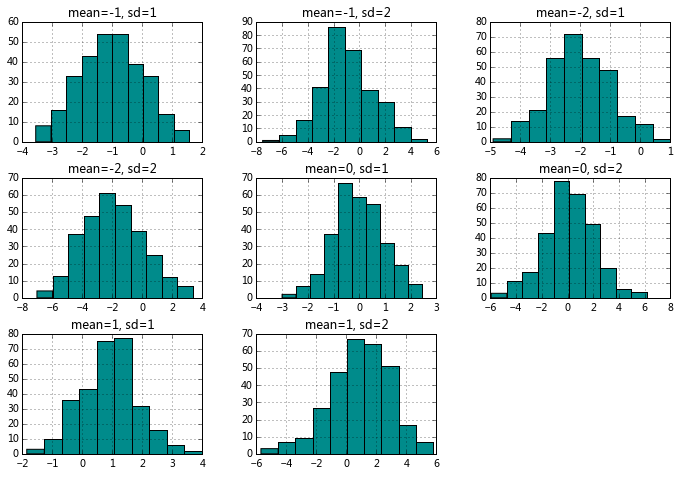

In [43]:
%pylab inline
means = [0, 0, 1, 1, -1, -1, -2, -2]
sdevs = [1, 2, 1, 2, 1, 2, 1, 2]
random_data = {}
nrows = 300
for mean, sdev in zip(means, sdevs):
    label = 'mean={}, sd={}'.format(mean, sdev)
    random_data[label] = normal(mean, sdev, nrows)
row_labels = ['row {}'.format(i) for i in range(nrows)]
dframe = DataFrame(random_data, index=row_labels)
dframe.hist(color='DarkCyan')
subplots_adjust(left=0.5, right=2, top=2.5, bottom=1.0)
dframe.loc[:,'mean=0, sd=2'].hist(bins=40, range=(-10, 10), color='LightYellow')
title('normal variates, mean 0, standard deviation 2')

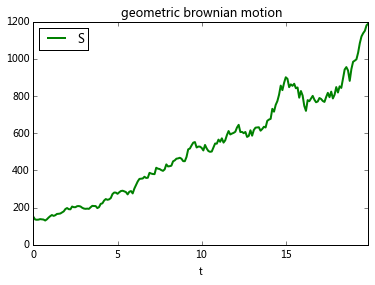

In [44]:
mu = 0.15
sigma = 0.33
S0 = 150
nsteps = 200
tmax = 20.
dt = tmax / nsteps
times = arange(0, tmax, dt)
gbm_data = DataFrame(times, columns=['t'], index=range(nsteps))
gbm_data.loc[:5,:]
gbm_data['drift'] = (mu - sigma ** 2 / 2) * gbm_data.loc[:, 't']
gbm_data['dW'] = normal(0.0, sigma * dt, nsteps)
gbm_data['W'] = gbm_data.loc[:,'dW'].cumsum()
gbm_data.ix[0, 'W'] = 0.0
gbm_data['S'] = S0 * exp(gbm_data.loc[:,'drift'] + gbm_data.loc[:,'W'])
gbm_data.plot(x='t', y='S', lw=2, color='green', title='geometric brownian motion');